In [1]:
import gzip
import json
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import *
from matplotlib.dates import DateFormatter
from matplotlib.ticker import AutoMinorLocator
from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

## Proliferation of Peering Facilities

Peering facilities are physical infrastructures that enable direct internetwork connections, optimize traffic flow and reduce costs. The country-level availability of these facilities is a function of the size and diversity of its peering ecosystems, and partially determinant of the country’s network resilience (e.g., against natural disasters).


We retrieve CAIDA’s PeeringDB archive (https://publicdata.caida.org/datasets/peeringdb-v2/), which provides daily snapshots, to evaluate the growth of peering facilities in Venezuela and Latin America starting from April 2018. PeeringDB offers public information about peering facilities, their locations, and network presence, the latter of which depends on reports from network operators. We download snapshots from the first day of each month to track the development of peering facilities in Venezuela and across the region.

In [3]:
country_styles = {
    "AR": {"alpha": 0.75, "lw": 2, "color": "C0", "label": "AR"},
    "AW": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BZ": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BQ": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BR": {"alpha": 0.75, "lw": 2, "color": "C1", "label": "BR"},
    "CL": {"alpha": 0.75, "lw": 2, "color": "C2", "label": "CL"},
    "CO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CR": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CU": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CW": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "DO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "EC": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SV": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "FK": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GF": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "HT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "HN": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "MX": {"alpha": 0.75, "lw": 2, "color": "C3", "label": "MX"},
    "NI": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PA": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PE": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SX": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GS": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SR": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "TT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "UY": {"alpha": 0.75, "lw": 2, "color": "C5", "label": "UY"},
    "VE": {"alpha": 0.75, "lw": 2, "color": "purple", "label": "VE"},
}

In [4]:
rir = pd.read_csv("data/external/rir.csv")

In [5]:
def get_peeringdb_df(year, month):
    pdb_filename = f"data/raw/03-10-15-peeringdb/peeringdb_2_dump_{year}_{month:02d}_01.json.gz"

    if os.path.exists(pdb_filename):
        with gzip.open(pdb_filename, "r") as f:
            pdb = json.load(f)
            return pdb

    return None

In [6]:
def generate_lacnic_facilities_over_time_snapshots_df(start_date, end_date):
    lacnic_fac = pd.DataFrame()
    date = start_date

    while date < end_date:
        pdb = get_peeringdb_df(date.year, date.month)
        if pdb:
            fac = pd.DataFrame(pdb["fac"]["data"])
            tmp_lacnic_fac = fac.loc[
                fac["country"].isin(rir.loc[rir["rir"] == "LACNIC"]["cc"])
            ]
            tmp_lacnic_fac["snapshot"] = np.repeat(date, tmp_lacnic_fac.shape[0])

            lacnic_fac = pd.concat([lacnic_fac, tmp_lacnic_fac])

        date += relativedelta(months=+1)

    return lacnic_fac

In [ ]:
start_date = datetime(2018, 4, 1)
end_date = datetime(2024, 4, 1)

lacnic_fac = generate_lacnic_facilities_over_time_snapshots_df(start_date, end_date)

In [8]:
def count_facilities_over_time(country_code=None):
    if country_code:
        fac = lacnic_fac.loc[lacnic_fac["country"] == country_code]
    else:
        fac = lacnic_fac

    return (
        fac.groupby("snapshot")["name"]
        .count()
        .reset_index()
        .rename(columns={"name": "facilities_count"})
    )

In [9]:
ve_facilities_count = count_facilities_over_time("VE")

In [10]:
ve_facilities_count

,snapshot,facilities_count
0,2021-11-01,2
1,2021-12-01,2
2,2022-01-01,2
3,2022-02-01,2
4,2022-03-01,2
5,2022-04-01,2
6,2022-05-01,2
7,2022-06-01,2
8,2022-07-01,2
9,2022-08-01,2


The analysis reveals a notable lag in Venezuela in this regard – only 4 out of 600 facilities in the region are located within the country; two of them registered in 2021 and the rest in 2023. 

In [11]:
for cc in ["BR", "MX", "CL", "AR", "VE", "UY", "CR"]:
    cc_facilities_count_over_time = count_facilities_over_time(cc)

    first_snapshot_count = cc_facilities_count_over_time.iloc[0]
    last_snapshot_count = cc_facilities_count_over_time.iloc[-1]

    print(cc)
    display(pd.DataFrame([first_snapshot_count, last_snapshot_count]))

BR


,snapshot,facilities_count
0,2018-04-01,102
65,2023-12-01,311


MX


,snapshot,facilities_count
0,2018-04-01,11
65,2023-12-01,45


CL


,snapshot,facilities_count
0,2018-04-01,18
65,2023-12-01,45


AR


,snapshot,facilities_count
0,2018-04-01,13
65,2023-12-01,58


VE


,snapshot,facilities_count
0,2021-11-01,2
25,2023-12-01,4


UY


,snapshot,facilities_count
0,2018-04-01,1
65,2023-12-01,1


CR


,snapshot,facilities_count
0,2018-04-01,3
65,2023-12-01,8


The difference is particularly stark when considering the corresponding growth in Brazil. The region’s largest (8.5 million km2) and most populated (214 million) country, Brazil shows unique growth from 102 to 311 facilities between 2018 and 2024. Other countries also experienced substantial growth during that period, including Mexico (from 11 to 45), and Chile (from 18 to 45).

While the limited growth of peering facilities in Venezuela may be due to the dominant market control of CANTV, Costa Rica, another country in Central America with a dominant state-owned provider ICE-AS11830 (24.1%), managed to expand its number of facilities from 3 to 8 during the same period.

In [12]:
lacnic_fac.loc[lacnic_fac["country"] == "VE"].drop_duplicates("name")

,org_name,website,updated,clli,name,created,net_count,address1,notes,org_id,...,aka,name_long,ix_count,diverse_serving_substations,available_voltage_services,property,region_continent,status_dashboard,social_media,campus_id
4295,Lumen Technologies Inc,https://www.lumen.com/,2021-10-12T20:41:34Z,,Lumen La Urbina,2021-10-12T17:22:18Z,1,"Edificio Century Link, Calle 7, La Urbina",,682,...,,,0.0,None,[],None,South America,NaN,NaN,NaN
4303,"Dayco Telecom, C.A.",https://daycohost.com/,2021-10-16T21:16:37Z,,Daycohost - Caracas,2021-10-15T19:56:44Z,1,Centro Tecnológico Daycohost,,14780,...,,,0.0,None,[],None,South America,NaN,NaN,NaN
4653,GigaPop CA,http://gigapop.com.ve,2022-08-30T22:18:06Z,,GigaPOP Maracaibo,2022-05-06T14:56:12Z,0,CALLE 53 CON AV 11C CASA NRO 50-166 URB CANTA ...,,32322,...,,,0.0,None,[],None,South America,None,NaN,NaN
4807,GlobeNet Cabos Submarinos S.A.,https://globenet.com/es/infrastructure/,2022-08-25T17:14:30Z,,Globenet Maiquetia,2022-08-25T14:55:41Z,0,"Maiquetía 1161, La Guaira",,3855,...,,,0.0,None,[],None,South America,None,NaN,NaN
4217,Cirion,http://www.ciriontechnologies.com,2023-05-30T19:03:04Z,,Cirion La Urbina,2021-10-12T17:22:18Z,8,"Edificio Century Link, Calle 7, La Urbina",,35201,...,,Cirion Technologies,0.0,None,[],,South America,,[{'identifier': 'http://www.ciriontechnologies...,NaN


In [13]:
pdb = get_peeringdb_df(2023, 12)
fac = pd.DataFrame(pdb["fac"]["data"])
netfac = pd.DataFrame(pdb["netfac"]["data"])

In [14]:
fac_ve = fac.loc[fac["country"] == "VE"].drop_duplicates("name")

In [15]:
netfac.loc[netfac["fac_id"].isin(fac_ve["id"])]

,status,city,updated,name,created,country,local_asn,fac_id,id,net_id
33897,ok,La Urbina,2021-10-13T13:08:59Z,Cirion La Urbina,2021-10-13T13:08:59Z,VE,8053,11286,51617,9922
33954,ok,"Las Mercedes, Caracas",2021-10-17T15:34:57Z,Daycohost - Caracas,2021-10-17T15:34:57Z,VE,8053,11310,51682,9922
34793,ok,La Urbina,2021-12-02T13:22:16Z,Cirion La Urbina,2021-12-02T13:22:16Z,VE,265641,11286,52644,17230
37203,ok,"Las Mercedes, Caracas",2022-06-06T17:49:59Z,Daycohost - Caracas,2022-05-28T17:10:16Z,VE,269832,11310,55501,26292
37204,ok,La Urbina,2022-05-28T17:10:29Z,Cirion La Urbina,2022-05-28T17:10:29Z,VE,269832,11286,55502,26292
38730,ok,La Urbina,2022-08-25T14:18:33Z,Cirion La Urbina,2022-08-25T14:18:33Z,VE,23379,11286,57225,16268
38731,ok,La Urbina,2022-08-25T14:35:57Z,Cirion La Urbina,2022-08-25T14:35:57Z,VE,270042,11286,57226,28789
39728,ok,La Urbina,2022-10-31T04:02:48Z,Cirion La Urbina,2022-10-31T04:02:48Z,VE,269738,11286,58405,24012
39924,ok,La Urbina,2022-11-11T14:32:29Z,Cirion La Urbina,2022-11-11T14:32:29Z,VE,267809,11286,58621,25047
42367,ok,La Guaira,2023-04-06T01:00:48Z,Globenet Maiquetia,2023-04-05T22:09:46Z,VE,272102,12670,61385,31298


Beyond the limited number of peering facilities in Venezuela, only Cirion’s facility in La Uriba has attracted some networks, with 11 reported in the latest snapshot of our analysis.

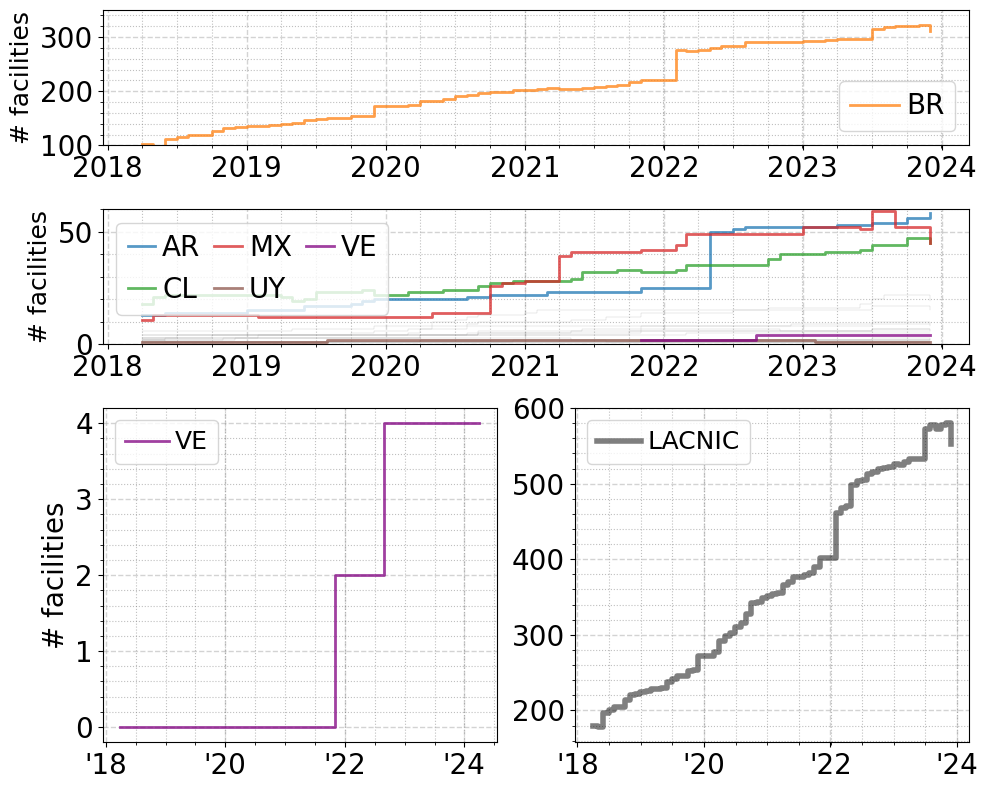

In [16]:
fig = plt.figure(figsize=(10, 8))

gs = fig.add_gridspec(4, 2)

ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2:4, 0])
ax3 = fig.add_subplot(gs[2:4, 1])

i = 0
for cc in rir.loc[rir["rir"] == "LACNIC"]["cc"]:
    facilities_count_over_time_for_cc = count_facilities_over_time(cc)

    if cc in ["AR", "BR", "MX", "CL", "UY", "VE"]:
        if cc == "BR":
            label = f"{cc}"
        else:
            label = None

        ax0.plot_date(
            facilities_count_over_time_for_cc["snapshot"],
            facilities_count_over_time_for_cc["facilities_count"],
            label=label,
            xdate=True,
            ydate=False,
            tz="UTC",
            alpha=0.75,
            lw=2,
            fmt="-",
            marker="None",
            color=f"C{i}",
            drawstyle="steps-post",
        )

        i += 1
    else:
        ax0.plot_date(
            facilities_count_over_time_for_cc["snapshot"],
            facilities_count_over_time_for_cc["facilities_count"],
            xdate=True,
            ydate=False,
            tz="UTC",
            alpha=0.5,
            lw=0.25,
            fmt="-",
            marker="None",
            drawstyle="steps-post",
            color="grey",
        )

ax0.set_ylabel("# facilities", fontsize=18)
ax0.tick_params(labelsize=20)
ax0.legend(
    loc="lower right",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax0.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax0.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax0.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax0.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax0.set_ylim(100, 350)

ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.xaxis.set_minor_locator(AutoMinorLocator())


####
i = 0
for cc in rir.loc[rir["rir"] == "LACNIC"]["cc"]:
    facilities_count_over_time_for_cc = count_facilities_over_time(cc)

    label = country_styles[cc]["label"]
    if cc == "BR":
        label = None

    ax1.plot_date(
        facilities_count_over_time_for_cc["snapshot"],
        facilities_count_over_time_for_cc["facilities_count"],
        label=label,
        xdate=True,
        ydate=False,
        tz="UTC",
        alpha=country_styles[cc]["alpha"],
        lw=country_styles[cc]["lw"],
        fmt="-",
        marker="None",
        color=country_styles[cc]["color"],
        drawstyle="steps-post",
    )

ax1.set_ylabel("# facilities", fontsize=18)
ax1.tick_params(labelsize=20)
ax1.legend(
    loc="upper left",
    ncol=3,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.0,
)

ax1.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax1.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax1.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax1.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax1.set_ylim(0, 60)

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax1.xaxis.set_major_formatter(DateFormatter("%Y"))


####
cc = "VE"
facilities_count_over_time_for_cc = count_facilities_over_time(cc)

facilities_count_over_time_for_cc = pd.concat(
    [
        facilities_count_over_time_for_cc,
        pd.DataFrame(
            [
                {
                    "snapshot": datetime.strptime(f"2018/4/1", "%Y/%m/%d"),
                    "facilities_count": 0,
                }
            ]
        ),
    ]
)

facilities_count_over_time_for_cc = pd.concat(
    [
        facilities_count_over_time_for_cc,
        pd.DataFrame(
            [
                {
                    "snapshot": datetime.strptime(f"2024/4/1", "%Y/%m/%d"),
                    "facilities_count": facilities_count_over_time_for_cc[
                        "facilities_count"
                    ].max(),
                }
            ]
        ),
    ]
)
facilities_count_over_time_for_cc = facilities_count_over_time_for_cc.sort_values(
    "snapshot"
)

ax2.plot_date(
    facilities_count_over_time_for_cc["snapshot"],
    facilities_count_over_time_for_cc["facilities_count"],
    label=f"{cc}",
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.75,
    lw=2,
    fmt="-",
    marker="None",
    color=f"purple",
    drawstyle="steps-post",
)

ax2.set_ylabel("# facilities", fontsize=20)
ax2.tick_params(labelsize=20)
ax2.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=18,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax2.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax2.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax2.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax2.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_major_formatter(DateFormatter("'%y"))
ax2.xaxis.set_major_locator(mdates.YearLocator(2))

####
cc = "LACNIC"
facilities_count_over_time_for_cc = count_facilities_over_time()


ax3.plot_date(
    facilities_count_over_time_for_cc["snapshot"],
    facilities_count_over_time_for_cc["facilities_count"],
    label=f"{cc}",
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.5,
    lw=4,
    fmt="-",
    marker="None",
    color=f"black",
    drawstyle="steps-post",
)

ax3.tick_params(labelsize=20)
ax3.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=18,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax3.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax3.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax3.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax3.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_minor_locator(AutoMinorLocator())

ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_major_formatter(DateFormatter("'%y"))
ax3.xaxis.set_major_locator(mdates.YearLocator(2))

####
fig.tight_layout()
fig.savefig("figures/03-peering_facilities_latam.pdf")

In [17]:
rir.loc[rir["rir"] == "LACNIC"]["cc"].drop_duplicates().values

array(['AR', 'AW', 'BZ', 'BO', 'BQ', 'BR', 'CL', 'CO', 'CR', 'CU', 'CW',
       'DO', 'EC', 'SV', 'FK', 'GF', 'GT', 'GY', 'HT', 'HN', 'MX', 'NI',
       'PA', 'PY', 'PE', 'SX', 'GS', 'SR', 'TT', 'UY', 'VE'], dtype=object)

The figure shows the evolution of peering facilities in the LACNIC region through four panels. The top two panels compare peering facility growth in Venezuela with other countries in the LACNIC region, with a separate panel for Brazil. We highlighted comparable peers in colors, with the remaining countries displayed in grey. The lower-left panel exclusively focuses on Venezuela, providing an in-depth view of its peering facilities, while the lower-right panel presents the aggregated number of facilities across the entire region.
